<a href="https://colab.research.google.com/github/raeubaen/kid/blob/main/colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
!7za x /content/drive/My\ Drive/06-11-2021,\ 16.23.22.zip -y


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.00GHz (50653),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/My Drive/                                  1 file, 428508294 bytes (409 MiB)

Extracting archive: /content/drive/My Drive/06-11-2021, 16.23.22.zip
 17% 4096 Open              --
Path = /content/drive/My Drive/06-11-2021, 16.23.22.zip
Type = zip
Physical Size = 428508294

  0%      0% 45 - 06-11-2021, 16.23.22/signal724.dat                                              0% 94 - 06-11-2021, 16.23.22/signal14618.dat                                              

In [61]:
!ls 06-11-2021,\ 16.23.22/signal* -1 | wc -l

24007


In [62]:
!cat 06-11-2021,\ 16.23.22/signal{100..10000}.dat > data

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import sys

matplotlib.rc('xtick', labelsize=16)
matplotlib.rc('ytick', labelsize=16)

plt.style.use('ggplot')

plt.rcParams['axes.facecolor'] = '#f7f9fc'
matplotlib.rcParams.update({'font.size': 20})

f = 'data'

df = pd.read_csv(f, sep=" ")
df.columns = ["i", "q", "t"]
df = df.sort_values(["t"])
df = df.reset_index()

In [119]:
df.i.diff(periods=10).rolling(8).mean().std()*6

20.648818894578863

0.48484848484848486 Hz


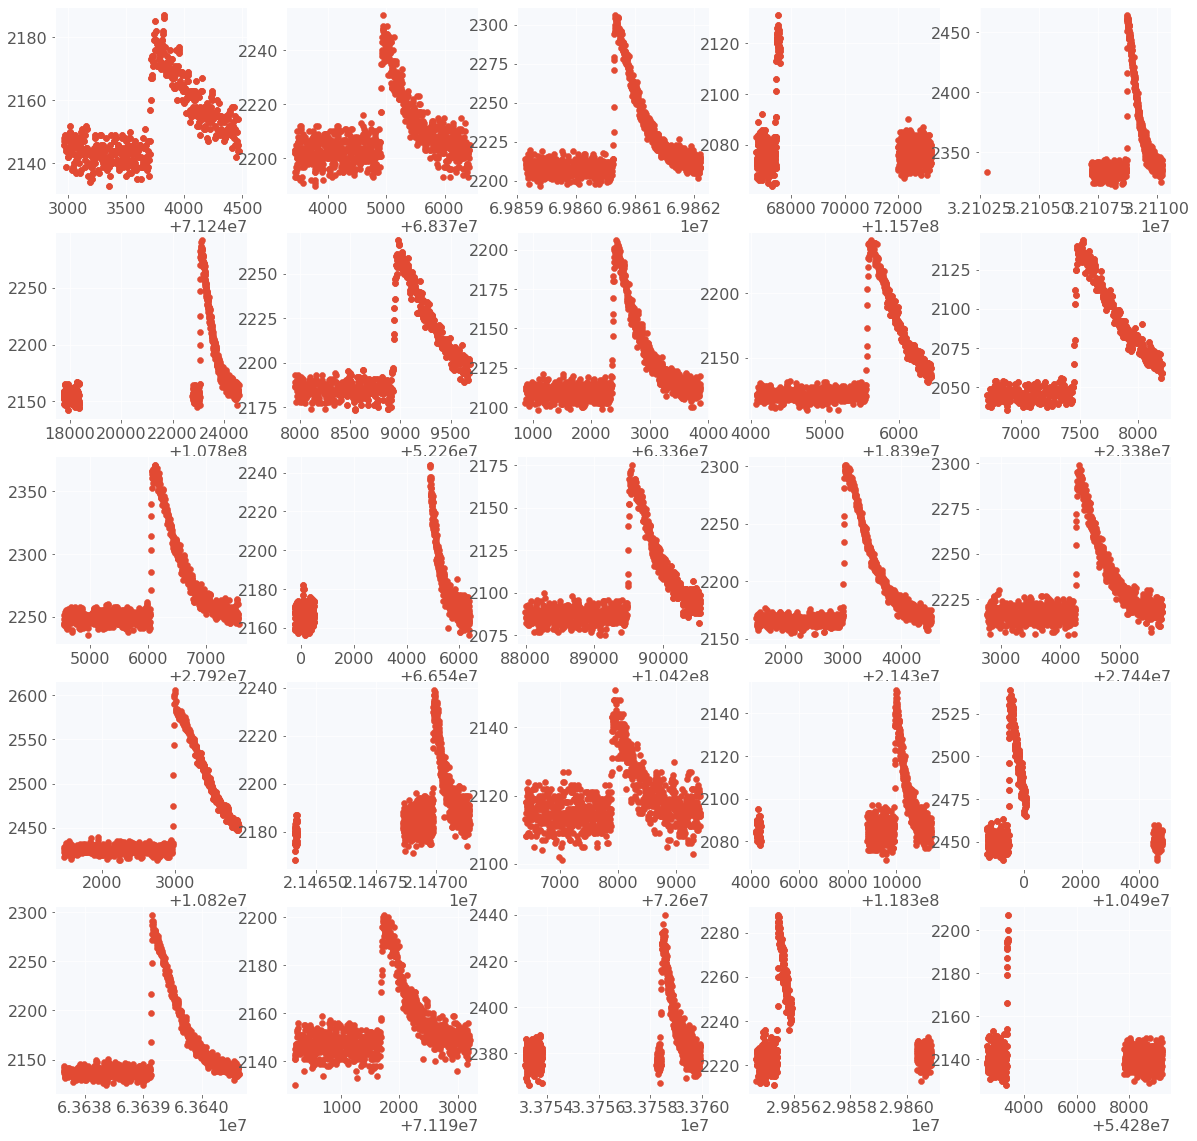

In [121]:
df2 = df[df.i.diff(periods=10).rolling(10).mean() > 20.6]
df2 = df2[df2.t.diff() > 3000]
print(f"{len(df2)/(0.01*9900)} Hz")
locs = list(df2.sample(25).index)
fig, axs = plt.subplots(5, 5, figsize=(20, 20))
for i in range(5):
  for j in range(5):
    loc = locs[5*i+j]
    df_tr = df.iloc[loc-500 : loc+500]
    axs[i][j].scatter(df_tr.t, df_tr.i)
plt.show()

In [170]:
len(df.i)

9666131

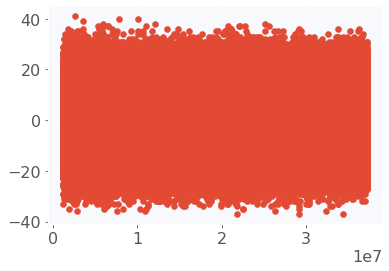

In [177]:
plt.scatter(df.t, df.i.diff()
plt.show()